In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [248]:
data_frame = pd.read_csv('heart_disease_data.csv')

In [249]:
data_frame.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [250]:
data_frame.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [251]:
data_frame['target'].head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [252]:
data_frame.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [253]:
data_frame['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [254]:
X = data_frame.iloc[:,0:-1]

In [255]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [256]:
Y = data_frame['target']

In [257]:
Y.shape

(303,)

In [258]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [259]:
model = LogisticRegression(max_iter=2000)

In [260]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,stratify=Y,random_state=0)

In [261]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [262]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=2000)

In [263]:
train_pred_acc = model.predict(X_train)

In [264]:
train_pred_Acc_Score = accuracy_score(train_pred_acc,Y_train)

In [265]:
print(train_pred_Acc_Score)

0.8429752066115702


In [266]:
test_model = model.predict(X_test)

In [267]:
test_pred_acc = accuracy_score(test_model,Y_test)
print(test_pred_acc)

0.8688524590163934


In [268]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, test_model)
cnf_matrix

array([[23,  5],
       [ 3, 30]], dtype=int64)

Text(0.5, 355.0, 'Predicted label')

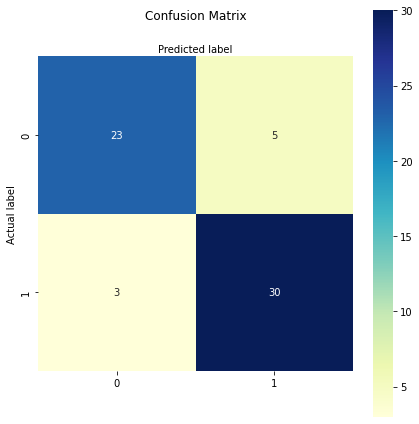

In [269]:
import seaborn as sns
class_names=['R','M'] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',square=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [270]:
print("Accuracy:",'%.2f' % metrics.accuracy_score(Y_test, test_model))
print("Precision:",'%.2f' %metrics.precision_score(Y_test, test_model))
print("Recall:",'%.2f' %metrics.recall_score(Y_test, test_model))
print("F1 Score:", 2*(metrics.precision_score(Y_test, test_model)*metrics.recall_score(Y_test, test_model)/(metrics.recall_score(Y_test, test_model)+metrics.precision_score(Y_test, test_model))))

Accuracy: 0.87
Precision: 0.86
Recall: 0.91
F1 Score: 0.8823529411764706


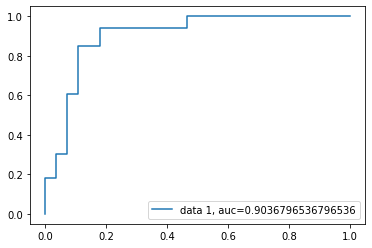

In [271]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal

In [272]:
test_input = (35,1,0,120,198,40,1,130,1,1.6,1,0,3)
test_input = np.asarray(test_input)
test_input = test_input.reshape(1,-1)
prediction = model.predict(test_input)
print(prediction)

if prediction[0] == 1:
    print("The patient has undelying heart disease")
else:
    print("The patient does not have undelying heart disease")

[1]
The patient has undelying heart disease


c:\Python\Python395\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
